In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn import mixture, metrics, cluster
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [19]:
# Fonction permettant d'effectuer un clustering avec la méthode du mélange de gaussienne.

def gmm(file, nb_clusters):

    X_train = pd.read_csv("../src/"+file[:-4]+"_out.txt")
    gmm = mixture.GaussianMixture(n_components = nb_clusters).fit(X_train)
    labels = gmm.predict(X_train)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = labels)
    plt.title("Affichage des clusters avec la méthode des mélanges de Gaussiennes")
    plt.xlabel("abscisse inconnu")
    plt.ylabel("ordonnée inconnue")
    plt.show()

    try :
        rand_value = str(metrics.adjusted_rand_score(data.iloc[:, 2], labels))
    except :
        rand_value = "NaN"

    return rand_value

In [20]:
# Fonction permettant d'effectuer le clustering avec la méthode DBSCAN.

def dbscan(file, eps, min_samples):

    X_train = pd.read_csv("../src/"+file[:-4]+"_out.txt")
    clustering = cluster.DBSCAN(eps = eps, min_samples = min_samples).fit(X_train)
    labels = clustering.labels_
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = labels)
    plt.title("Affichage des clusters avec la méthode des mélanges DBSCAN")
    plt.xlabel("abscisse inconnu")
    plt.ylabel("ordonnée inconnue")
    plt.show()

    try :
        rand_value = str(metrics.adjusted_rand_score(data.iloc[:, 2], labels))
    except :
        rand_value = "NaN"

    return rand_value

In [21]:
# Fonction permettant d'effectuer le clustering avec la méthode des k-means.

def kmeans(file, nb_clusters, init, n_init):

    X_train = pd.read_csv("../src/"+file[:-4]+"_out.txt")
    kmeans = cluster.KMeans(nb_clusters, init, n_init).fit(X_train)
    kmeans.predict(X_train)
    reskmeans = kmeans.transform(X_train)
    labels = kmeans.labels_

    plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=labels)
    plt.title("Affichage des clusters avec la méthode des k-means")
    plt.xlabel("abscisse inconnu")
    plt.ylabel("ordonnée inconnue")
    plt.show()

    try :
        rand_value = str(metrics.adjusted_rand_score(data.iloc[:, 2], labels))
    except :
        rand_value = "NaN"

    return rand_value

In [22]:
# Fonction permettant d'effectuer le clustering avec la méthode classification hiérarchique ascendante.min_samples

def hierarchique(data,method,metric,nb_clusters_max):

    X_train = pd.read_csv("../src/"+file[:-4]+"_out.txt")
    l=linkage(X_train,method,metric)
    f=fcluster(l,criterion='maxclust',t=nb_clusters_max)
    
    
    d=dendrogram(l)
    dendrogram(l)
    plt.title("Dendrogramme")
    plt.show()
    plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=f)

    try :
        rand_value = str(metrics.adjusted_rand_score(X_train.iloc[:, 2], labels))
    except :
        rand_value = "NaN"

    return rand_value

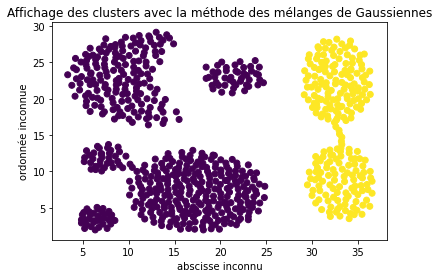

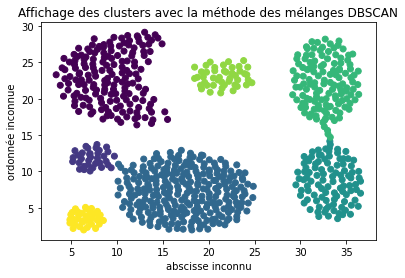

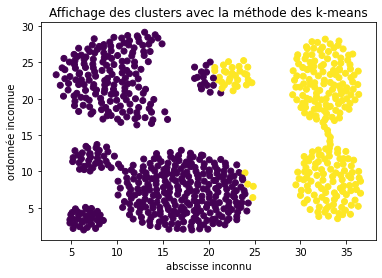

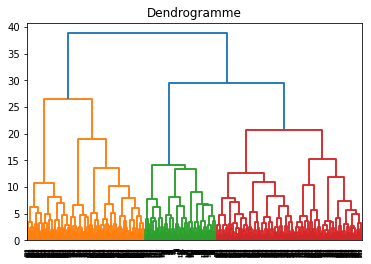

-------------------------------------------------
| ############## | gmm | dbscan | kmeans |   CHA  |
-------------------------------------------------
| indice de Rand | NaN |   NaN  |   NaN  |   NaN  |
-------------------------------------------------


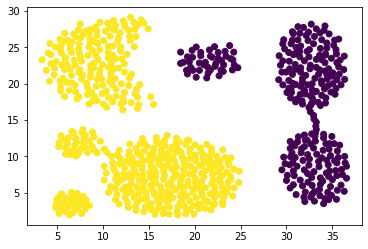

In [27]:
# Traitement du fichier jain.txt :

file = "Aggregation.txt"
# Nombre de clusters pour les méthode du mélange des Gaussiennes, k-means et CHA.
nb_clusters = 2
# Distance pour la méthode DBSCAN.
eps = 2
# Nombre minimum de voisins pour la méthode DBSCAN.
min_samples = 3
# Méthode de calcul du k-means.
init = "k-means++"
# Nombre de clusters à l'initialisation.
n_init = 2
# Metrique utilisée
metric = "euclidean"
#Methode utilisée parle le CHA
method = "complete"

rand_value_gmm = gmm(file, nb_clusters)
rand_value_dbscan = dbscan(file, eps, min_samples)
rand_value_kmeans = kmeans(file, nb_clusters, init, n_init)
rand_value_hierarchique = hierarchique(file, method, metric, nb_clusters)
print("-------------------------------------------------")
print("| ############## | gmm | dbscan | kmeans |   CHA  |")
print("-------------------------------------------------")
print("| indice de Rand | "+str(rand_value_gmm)+" |   "+str(rand_value_dbscan)+"  |   "+str(rand_value_kmeans)+"  |   "+str(rand_value_hierarchique)+"  |")
print("-------------------------------------------------")